<a href="https://colab.research.google.com/github/SIDIBEMoussa/Simple_training/blob/main/Examen_dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as stm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_table("bijouterie.txt",sep=",")

In [3]:
data.head(5)

,ID,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data=data.iloc[:,2:]

In [5]:
data.head()

,cut,color,clarity,depth,table,price,x,y,z
0,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
corr=data.corr()
corr

,depth,table,price,x,y,z
depth,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


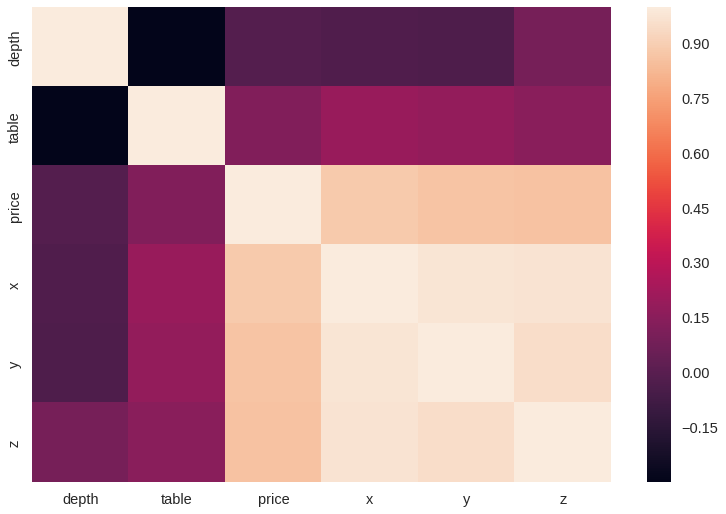

In [109]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
sns.heatmap(corr)

*  Nous observons une forte corrélation entre les trois variables x,y,z et une corrélation significative du prix des diamants avec x,y,z.


*   Bien que faible l'augmentation des dimension  x,y,z du diamant augmente la table du diamant tandisque seulement depth n'est corrélé positivement qu'avec z ce qui est justifiè dans réprésentation dans l'espace d'un diamnt

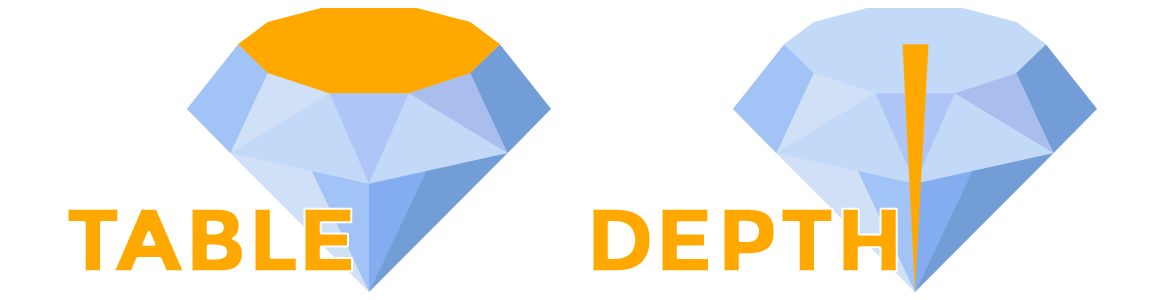

In [32]:
stat_desc=data.describe(include="all")
stat_desc

,cut,color,clarity,depth,table,price,x,y,z
count,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [9]:
data.columns

Index(['cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

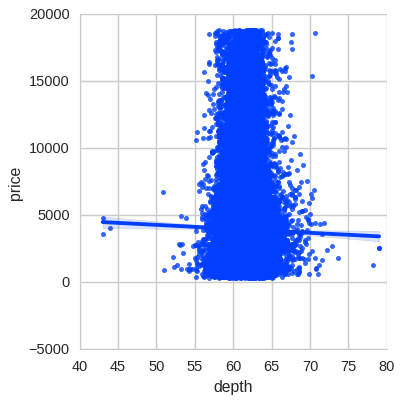

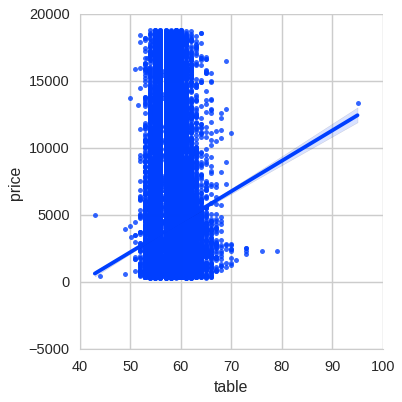

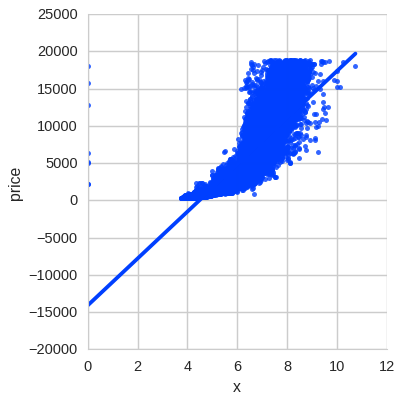

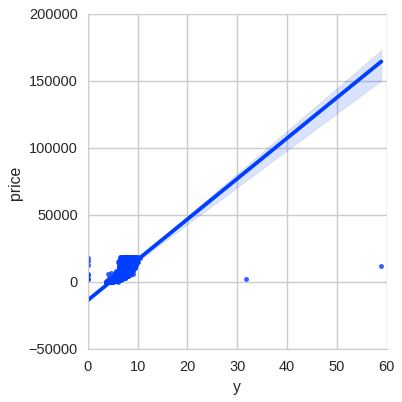

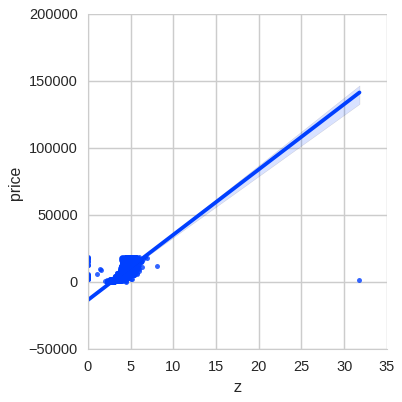

In [108]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
for col in data.columns:
  if col not in ["cut","color","clarity","price"]:
      sns.lmplot(x=col,y="price",data=data)

(-0.5, 4.5, 0.0, 15000.0)

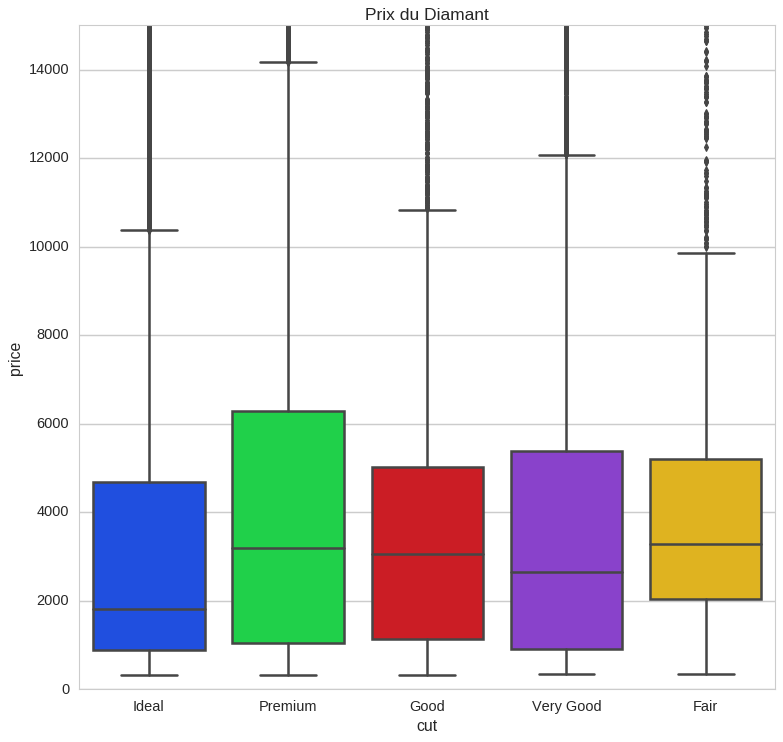

In [107]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
plt.figure(figsize=(10,10))
sns.boxplot(x="cut",y="price",data=data)
plt.title("Prix du Diamant")
plt.axis(ymax=15000)

In [110]:
data.head(1)

,cut,color,clarity,depth,table,price,x,y,z
0,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


(-0.5, 6.5, 0.0, 15000.0)

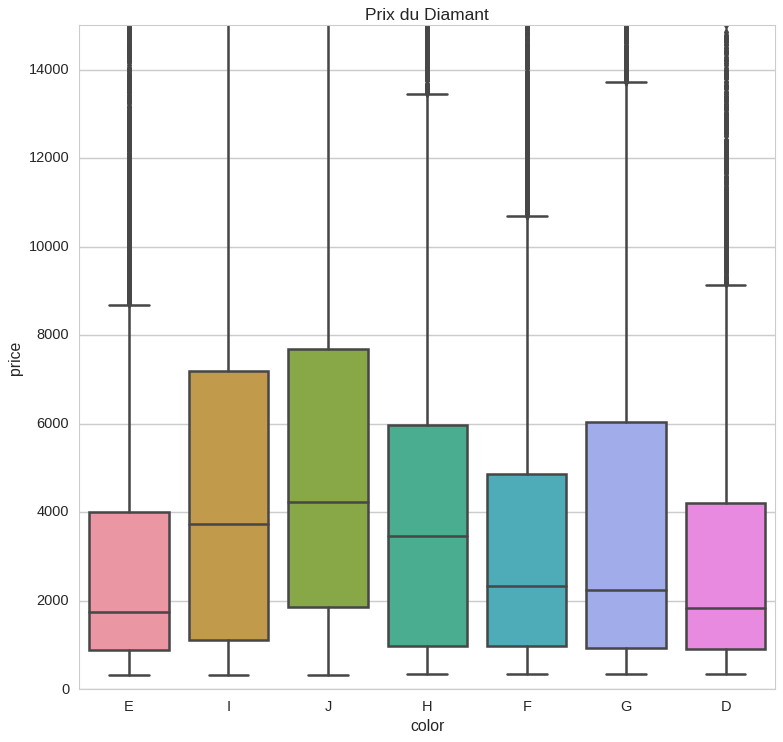

In [111]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
plt.figure(figsize=(10,10))
sns.boxplot(x="color",y="price",data=data)
plt.title("Prix du Diamant")
plt.axis(ymax=15000)

(-0.5, 7.5, 0.0, 15000.0)

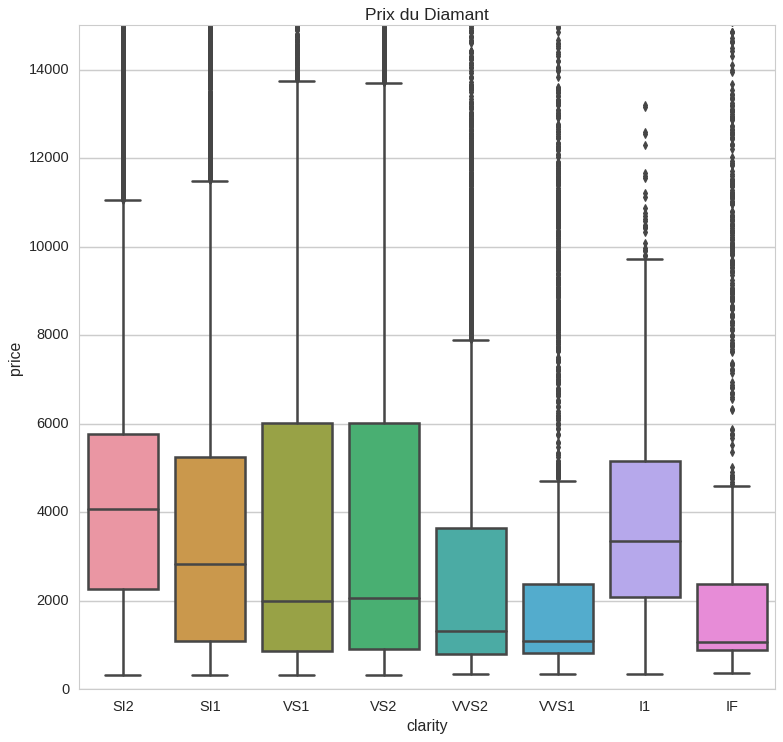

In [120]:
plt.style.use(plt.style.available[10])

plt.rcParams.update({"font.size":14})
plt.figure(figsize=(10,10))
sns.boxplot(x="clarity",y="price",data=data)
#sns.swarmplot(x="clarity",y="price",data=data,ax=False)
plt.title("Prix du Diamant")
plt.axis(ymax=15000)

Text(0.5, 1.0, 'Table de diamant')

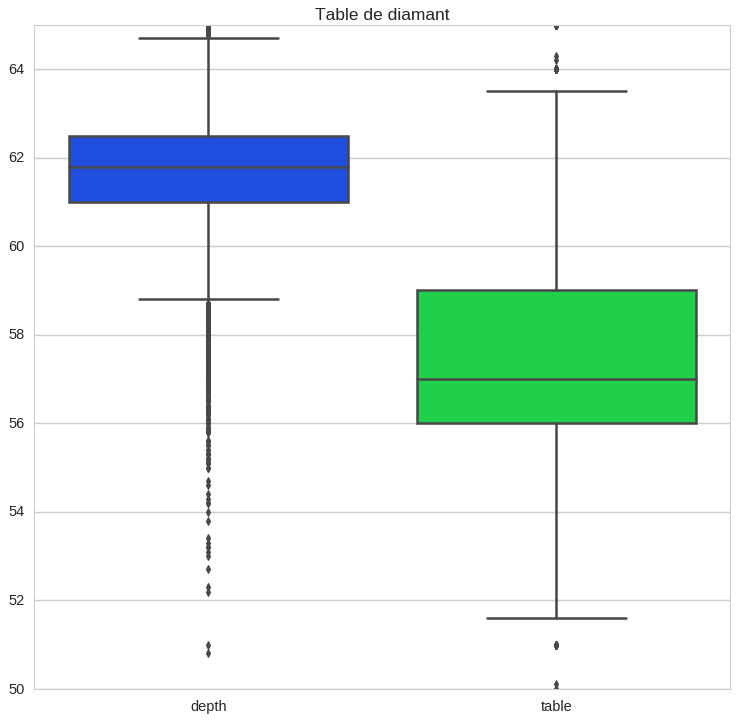

In [117]:
plt.figure(figsize=(10,10))
sns.boxplot(data=data[["depth","table"]])
plt.axis(ymin=50,ymax=65)
plt.title("Table de diamant")

Text(0.5, 1.0, 'Table de diamant')

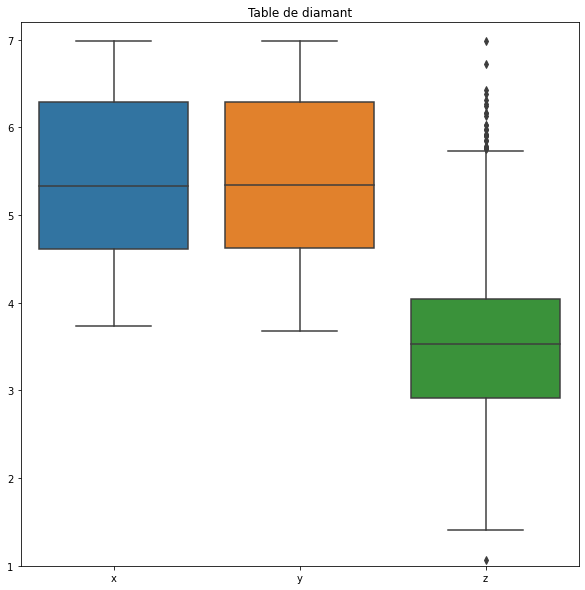

In [73]:
plt.figure(figsize=(10,10))
r=data[data.iloc[:,-3:]<7]
sns.boxplot(data=r[["x","y","z"]])
plt.axis(ymin=1,ymax=7.2)
plt.title("Table de diamant")

In [11]:
from sklearn.preprocessing import StandardScaler as S

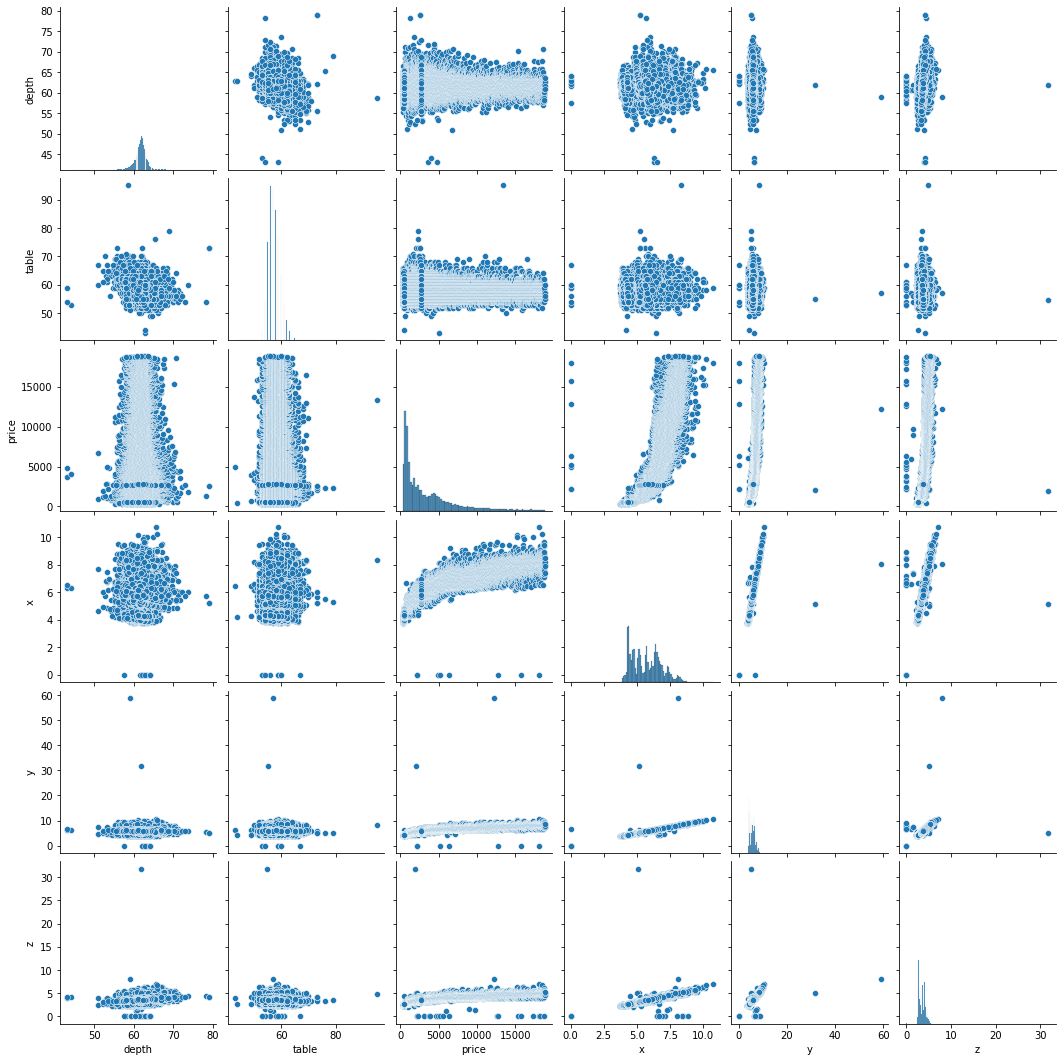

In [12]:
sns.pairplot(data,data=data)

In [15]:
data.head(1)

,cut,color,clarity,depth,table,price,x,y,z
0,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [27]:
data1=data.iloc[:,3:]

In [28]:
X.head(2)

,depth,table,price,x,y,z
0,61.5,55.0,326,3.95,3.98,2.43
1,59.8,61.0,326,3.89,3.84,2.31


In [29]:
from sklearn.preprocessing import StandardScaler
sts=StandardScaler()

In [30]:
X_nor=sts.fit_transform(data1)

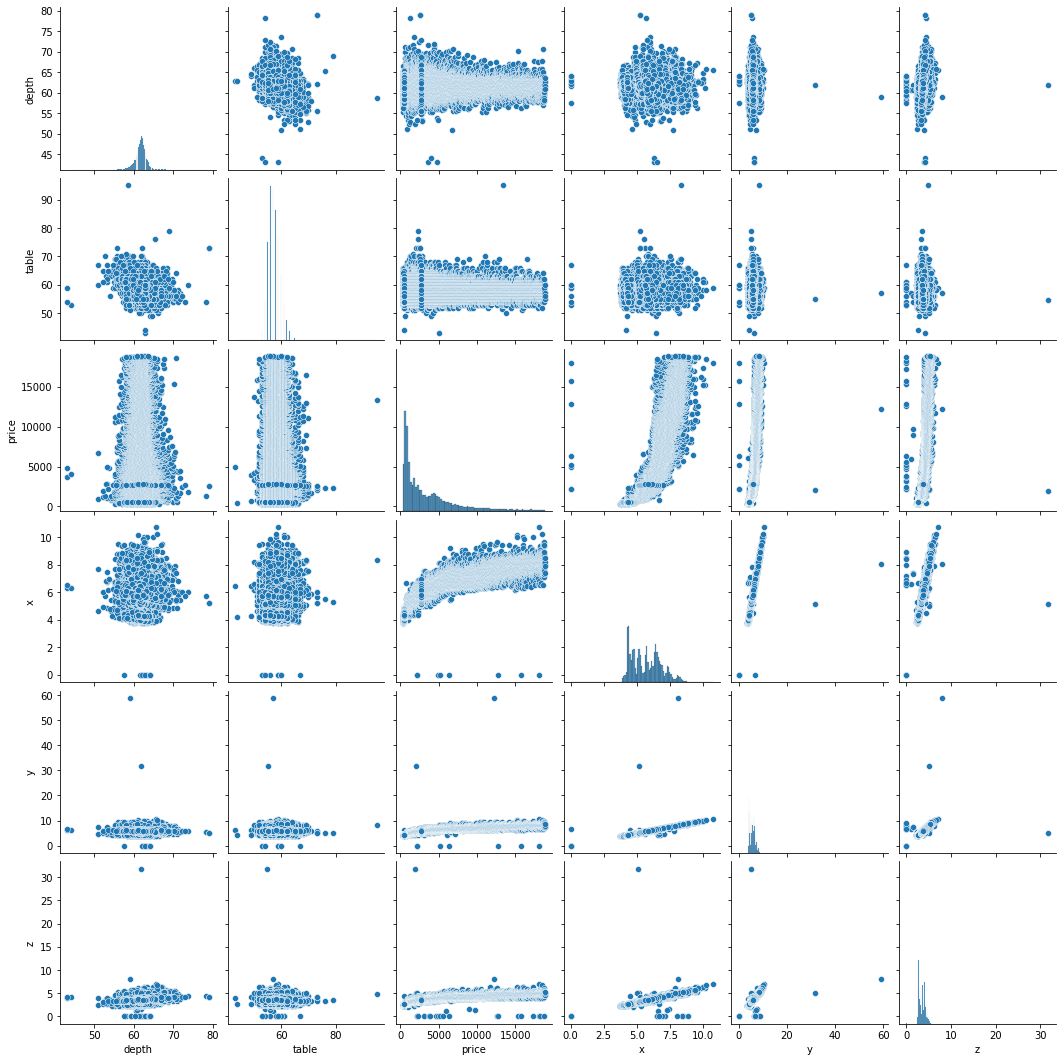

In [31]:
sns.pairplot(data=data1)

In [ ]:
data.head(2)

In [ ]:
data.columns

In [ ]:
data1=data[data.depth<70]

In [ ]:
for i,j in enumerate(colonnes):
  print("{}:{}".format(i,j))

In [ ]:
colonnes=["depth","table","x","y","z"]

plt.figure(figsize=(10,20))
plt.boxplot(data.depth)